In [1]:
import salty
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]   

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# Anion Social Network

In [8]:
df = pd.read_csv('../data/adaptive_learn_results.csv')

In [9]:
cations = []
for i in range(len(df['Salt Smiles'])):
    cations.append(df['Salt Smiles'][i].split(".")[0])
print(len(df['Salt Smiles']))

390


In [4]:
(pd.DataFrame(cations)[0].unique())

array(['N#CNCCn1cc[n+](CO)c1', 'CCCCCCC[n+]1ccn(CC)c1N',
       'Cc1ccc[n+](CCCCCCCCC(F)(F)F)c1', 'PCCCCCCCCCCC[n+]1ccccc1',
       'CCCCCC(CCCC)Cn1cc[n+](CN)c1', 'FCCCCCn1cc[n+](CCCCF)c1NF',
       'CCCC(P)CCCC[N+]1(C)CCCCC1', 'CCCCn1cc[n+](C)c1NCC',
       'CCCC[P+](CC)(CCCC)CC(S)CC', 'CCCC(CC)CCn1cc[n+](C)c1C(F)(F)F',
       'C=NC([n+]1ccn(CCCCCCC)c1)C(F)(F)F',
       'CCCCC(C)(CCC)CC[N+](C)(C)CC(F)(F)F', 'CCCCCCC(N)[N+](C)(CC)CCCC',
       'CCC[n+]1ccn(CC(C)C(N)(F)F)c1', 'CCCCCC[n+]1ccn(CC(C)C)c1C(F)(F)F',
       'CCCn1cc(N=C=O)[n+](CCC)c1', 'CCC[N+](C)(CCO)CCCCCCS(C)(=O)=O',
       'CCCCC(CC)(CCC)CC[N+]1=C(S)CCC1',
       'CCCC(C)CCCC([n+]1ccccc1)C(F)(F)F', 'FC[n+]1cc(F)n(CCCOF)c1',
       'CCCCCCNCn1cc[n+](C)c1C#N', 'CCCC(C)c1cccc[n+]1C(CCP)C(F)(F)F',
       'CCCCCCC[N+](C)(C)C(P)CCCC', 'CCc1ccc(N=NC)c[n+]1CC(CF)C(=O)F',
       'CCCCc1cn(C)c[n+]1CCCC(CF)C(=O)O', 'CCCCNc1[nH]c(N)c[n+]1C',
       'C=S(=O)(F)c1n(C)c(NPC(C)C)c(NC)[n+]1F',
       'CCC(CC)COC(C(P)CF)C(N)[NH2+]OC', 'CCC

In [12]:
di = {'bis[(trifluoromethyl)sulfonyl]imide': 'bis(trifluoromethylsulfonyl)imide'}
df = df.replace({"Anion": di})
(df.Anion.unique())

array(['bromide', 'L-prolinate', 'acetate', 'L-lysinate', 'L-threoninate',
       'ethylsulfate', 'trifluoroacetate', 'dimethylphosphate',
       'methanesulfonate', 'dicyanoazanide', 'L-serinate',
       'octyl sulfate', 'bis(trifluoromethylsulfonyl)imide',
       'dicyanamide', 'tricyanomethane', 'trifluoromethanesulfonate',
       'methylsulfate', 'thiocyanate', 'L-cysteinate', 'chloride',
       'nitrate', '2-aminoethanesulfonate'], dtype=object)

In [13]:
f = {'Anion' : ['count'], 
     'Molecular Relative' : ['nunique'], 
     'Category' : ['nunique'],
     'Cation Heavy Atoms' : ['mean', 'std'], 
     'Tanimoto Similarity Score' : ['mean', 'std']}
dff = df.groupby(['Anion']).agg(f)
dff.sort_values([('Anion', 'count')], inplace=True)
# dff.to_csv("../../ALD_Manuscript/assets/anion_summary.csv")

In [14]:
dff

Anion Molecular Relative Category  \
                                  count            nunique  nunique   
Anion                                                                 
2-aminoethanesulfonate                7                  6        3   
bromide                               9                  4        2   
thiocyanate                          11                  5        3   
ethylsulfate                         12                  6        2   
dimethylphosphate                    12                  5        3   
L-cysteinate                         13                  9        3   
trifluoromethanesulfonate            14                  5        3   
acetate                              14                  8        4   
methylsulfate                        15                  6        3   
dicyanamide                          16                  6        2   
trifluoroacetate                     17                 11        4   
chloride                             18                  9        2   
dicyanoazanide                       18                  7        3   
L-serinate                           18                 10        4   
methanesulfonate                     20                  7        3   
tricyanomethane                      20                 10        4   
nitrate                              21                  8        3   
bis(trifluoromethylsulfonyl)imide    22                  6        3   
L-prolinate                          22                  6        3   
L-threoninate                        26                 12        5   
octyl sulfate                        28                 10        4   
L-lysinate                           37                 12        6   

                                  Cation Heavy Atoms            \
                                                mean       std   
Anion                                                            
2-aminoethanesulfonate                     15.142857  4.140393   
bromide                                    14.222222  3.456074   
thiocyanate                                16.090909  2.547726   
ethylsulfate                               15.166667  2.657180   
dimethylphosphate                          14.666667  3.550501   
L-cysteinate                               14.923077  3.303068   
trifluoromethanesulfonate                  14.571429  3.715131   
acetate                                    16.428571  2.793241   
methylsulfate                              15.400000  3.112188   
dicyanamide                                14.875000  3.222318   
trifluoroacetate                           14.176471  3.844400   
chloride                                   13.444444  2.548869   
dicyanoazanide                             15.111111  2.676453   
L-serinate                                 15.500000  3.072650   
methanesulfonate                           13.600000  3.662039   
tricyanomethane                            13.150000  3.498496   
nitrate                                    14.142857  2.780031   
bis(trifluoromethylsulfonyl)imide          15.954545  2.192569   
L-prolinate                                15.500000  3.433033   
L-threoninate                              14.769231  3.558738   
octyl sulfate                              16.857143  2.239614   
L-lysinate                                 15.432432  3.370959   

                                  Tanimoto Similarity Score            
                                                       mean       std  
Anion                                                                  
2-aminoethanesulfonate                             0.698392  0.173217  
bromide                                            0.568134  0.052979  
thiocyanate                                        0.577951  0.097113  
ethylsulfate                                       0.596448  0.072321  
dimethylphosphate                                  0.659688  0.145850  
L-cysteinate                   

In [15]:
dff['Anion']['count'].axes

[Index(['2-aminoethanesulfonate', 'bromide', 'thiocyanate', 'ethylsulfate',
        'dimethylphosphate', 'L-cysteinate', 'trifluoromethanesulfonate',
        'acetate', 'methylsulfate', 'dicyanamide', 'trifluoroacetate',
        'chloride', 'dicyanoazanide', 'L-serinate', 'methanesulfonate',
        'tricyanomethane', 'nitrate', 'bis(trifluoromethylsulfonyl)imide',
        'L-prolinate', 'L-threoninate', 'octyl sulfate', 'L-lysinate'],
       dtype='object', name='Anion')]

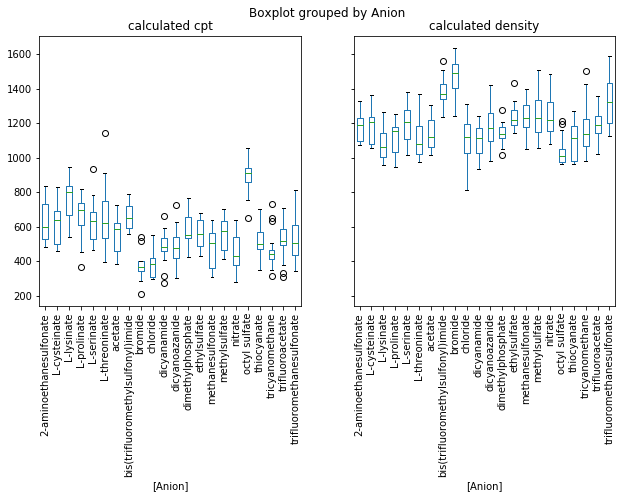

In [16]:
ax = df.boxplot(column=['calculated cpt',
       'calculated density'], by=['Anion'], grid=False, figsize=[10,5], 
           rot=90)#, return_type='axes')

In [17]:
# ax[0].figure.savefig(fname="../../ALD_Manuscript/boxplot.png".format(smi), 
#                            bbox_inches='tight', format='png', dpi=300)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1175a8048>,
      dtype=object)

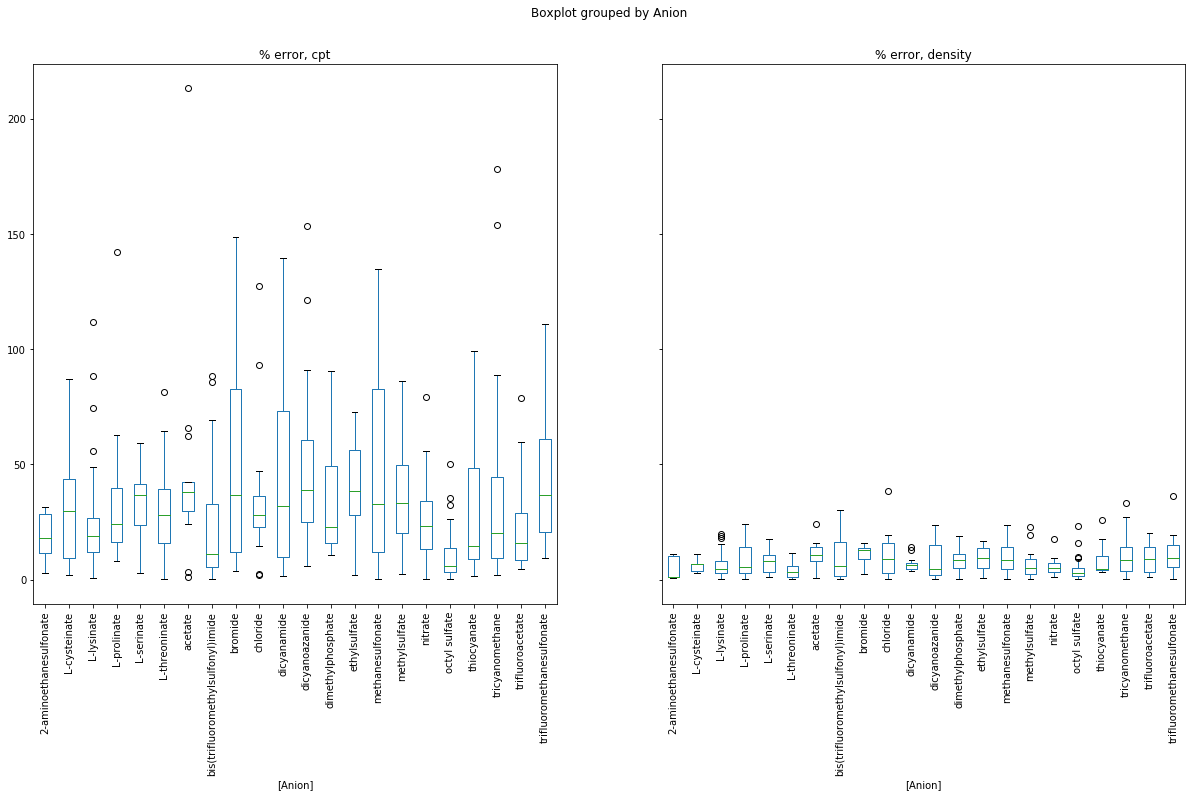

In [18]:
df.boxplot(column=['% error, cpt', '% error, density'], by=['Anion'], grid=False, figsize=[20,10], rot=90)

In [19]:
for i in range(len(df.Anion.unique())):
    smi = salty.check_name(df.Anion.unique()[i])
    print("{}\t{}".format(smi,df.Anion.unique()[i]))

[Br-]	bromide
C1C[C@H](NC1)C(=O)[O-]	L-prolinate
CC(=O)[O-]	acetate
C(CCN)C[C@@H](C(=O)[O-])N	L-lysinate
C[C@H]([C@@H](C(=O)[O-])N)O	L-threoninate
CCOS(=O)(=O)[O-]	ethylsulfate
C(=O)(C(F)(F)F)[O-]	trifluoroacetate
COP(=O)([O-])OC	dimethylphosphate
CS(=O)(=O)[O-]	methanesulfonate
C(=[N-])=NC#N	dicyanoazanide
C([C@@H](C(=O)[O-])N)O	L-serinate
CCCCCCCCOS(=O)(=O)[O-]	octyl sulfate
C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F	bis(trifluoromethylsulfonyl)imide
C(#N)[N-]C#N	dicyanamide
C(#N)[C-](C#N)C#N	tricyanomethane
C(F)(F)(F)S(=O)(=O)[O-]	trifluoromethanesulfonate
COS(=O)(=O)[O-]	methylsulfate
C(#N)[S-]	thiocyanate
C([C@@H](C(=O)[O-])N)S	L-cysteinate
[Cl-]	chloride
[N+](=O)([O-])[O-]	nitrate
C(CS(=O)(=O)[O-])N	2-aminoethanesulfonate
